# Examen

Utilice el archivo train.csv en los datos adjuntos para generar un modelo de regresión 
lineal que prediga la afluencia para cada estación contenida en el archivo valid.csv
para el momento del tiempo t=700.

## Importar

In [1]:
# %load basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
BASE_DIR = '/Users/efraflores/Desktop/EF/corner/data/practice/'
sorted(os.listdir(BASE_DIR))

['.DS_Store',
 '2019-05.csv',
 'BASE DE VENTA NESTLE FEB 21.csv',
 'data_clean.csv',
 'estimado.csv',
 'exam.csv',
 'fraudTrain.csv',
 'images.csv',
 'images_array.csv',
 'location_orders.csv',
 'product_branches_heb_chedraui.csv',
 'product_branches_heb_chedraui.xlsx',
 'raceplot_data.txt',
 'train.csv',
 'valid.csv',
 'zip_arff']

In [2]:
df = pd.read_csv(os.path.join(BASE_DIR,'train.csv'))
print(df.info())
df.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186900 entries, 0 to 186899
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   afluencia    186900 non-null  int64 
 1   id_estacion  186900 non-null  object
 2   t            186900 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ MB
None


,afluencia,id_estacion,t
12077,210266,Est00301,547
138907,223133,Est00309,166
153950,169403,Est00182,624
165239,15931,Est00028,534


In [3]:
#Distribución de t
df['t'].describe([i/10 for i in range(10)]+[.05,.95]).to_frame()

,t
count,186900.00
mean,350.50
std,202.07
min,1.00
0%,1.00
5%,35.95
10%,70.90
20%,140.80
30%,210.70
40%,280.60


In [4]:
#Todas las estaciones cuentan con 700 registros
df.groupby('id_estacion')['t'].count().to_frame().sort_values(by='t')

,t
id_estacion,
Est00000,700
Est00243,700
Est00244,700
Est00245,700
Est00251,700
...,...
Est00145,700
Est00147,700
Est00148,700


## TAD

In [5]:
#Omitir los registros con t=700 para intentar predecirlos después
label = df[df['t']==700].copy()
df = df[df['t']!=700].copy()
df['t'].describe([i/10 for i in range(10)]+[.05,.95]).to_frame()

,t
count,186633.00
mean,350.00
std,201.78
min,1.00
0%,1.00
5%,35.00
10%,70.00
20%,140.00
30%,210.00
40%,280.00


In [6]:
label.groupby('id_estacion')['t'].agg(['count','sum']).describe()

,count,sum
count,267.00,267.00
mean,1.00,700.00
std,0.00,0.00
min,1.00,700.00
25%,1.00,700.00
50%,1.00,700.00
75%,1.00,700.00
max,1.00,700.00


In [7]:
#Crear particiones con el mismo % de datos, retbins=True para guardar etiquetas
df['t_cut'],q_bins = pd.qcut(df['t'],q=9,duplicates='drop',retbins=True)
display(df['t_cut'].value_counts(1).to_frame())
print(q_bins)

,t_cut
"(0.999, 78.0]",0.11
"(78.0, 156.0]",0.11
"(233.667, 311.0]",0.11
"(311.0, 389.0]",0.11
"(466.333, 544.0]",0.11
"(544.0, 622.0]",0.11
"(156.0, 233.667]",0.11
"(389.0, 466.333]",0.11
"(622.0, 699.0]",0.11


[  1.          78.         156.         233.66666667 311.
 389.         466.33333333 544.         622.         699.        ]


In [8]:
def perc_70(x):
    return np.percentile(x,70)

df = df.pivot_table(index='id_estacion',
                    columns='t_cut',
                    values='afluencia',
                    aggfunc=['sum','mean','median',perc_70])
df.columns = [x+"_"+str(y) for x,y in df.columns]

display(df.sample())
display(df.describe())

,"sum_(0.999, 78.0]","sum_(78.0, 156.0]","sum_(156.0, 233.667]","sum_(233.667, 311.0]","sum_(311.0, 389.0]","sum_(389.0, 466.333]","sum_(466.333, 544.0]","sum_(544.0, 622.0]","sum_(622.0, 699.0]","mean_(0.999, 78.0]","mean_(78.0, 156.0]","mean_(156.0, 233.667]","mean_(233.667, 311.0]","mean_(311.0, 389.0]","mean_(389.0, 466.333]","mean_(466.333, 544.0]","mean_(544.0, 622.0]","mean_(622.0, 699.0]","median_(0.999, 78.0]","median_(78.0, 156.0]","median_(156.0, 233.667]","median_(233.667, 311.0]","median_(311.0, 389.0]","median_(389.0, 466.333]","median_(466.333, 544.0]","median_(544.0, 622.0]","median_(622.0, 699.0]","perc_70_(0.999, 78.0]","perc_70_(78.0, 156.0]","perc_70_(156.0, 233.667]","perc_70_(233.667, 311.0]","perc_70_(311.0, 389.0]","perc_70_(389.0, 466.333]","perc_70_(466.333, 544.0]","perc_70_(544.0, 622.0]","perc_70_(622.0, 699.0]"
id_estacion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Est00277,9937124,9648162,9798485,10114355,9720691,8352638,3288281,4483635,5042630,127399.03,123694.38,127253.05,129671.22,124624.24,108475.82,42157.45,57482.50,65488.70,137151.50,135930.50,135815.00,134700.00,132731.50,121208.00,43938.00,59154.00,69470.00,146212.30,143389.60,144994.20,148197.10,147003.00,145923.60,47985.40,64781.10,73931.00


,"sum_(0.999, 78.0]","sum_(78.0, 156.0]","sum_(156.0, 233.667]","sum_(233.667, 311.0]","sum_(311.0, 389.0]","sum_(389.0, 466.333]","sum_(466.333, 544.0]","sum_(544.0, 622.0]","sum_(622.0, 699.0]","mean_(0.999, 78.0]","mean_(78.0, 156.0]","mean_(156.0, 233.667]","mean_(233.667, 311.0]","mean_(311.0, 389.0]","mean_(389.0, 466.333]","mean_(466.333, 544.0]","mean_(544.0, 622.0]","mean_(622.0, 699.0]","median_(0.999, 78.0]","median_(78.0, 156.0]","median_(156.0, 233.667]","median_(233.667, 311.0]","median_(311.0, 389.0]","median_(389.0, 466.333]","median_(466.333, 544.0]","median_(544.0, 622.0]","median_(622.0, 699.0]","perc_70_(0.999, 78.0]","perc_70_(78.0, 156.0]","perc_70_(156.0, 233.667]","perc_70_(233.667, 311.0]","perc_70_(311.0, 389.0]","perc_70_(389.0, 466.333]","perc_70_(466.333, 544.0]","perc_70_(544.0, 622.0]","perc_70_(622.0, 699.0]"
count,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00,267.00
mean,11239731.44,11413252.23,11342222.67,11780947.31,11559239.25,10726194.41,7327695.12,8504402.92,8983574.55,144099.12,146323.75,147301.59,151037.79,148195.38,139301.23,93944.81,109030.81,116669.80,154609.00,156499.71,154730.75,161519.84,156395.85,146394.06,98636.08,113032.85,122412.22,167380.44,168775.86,166718.74,173574.20,172959.81,168474.94,105662.66,121210.52,129966.01
std,10829080.20,10956832.97,10805102.05,11004134.91,10635281.64,9338449.61,8664193.98,8906722.84,8882891.09,138834.36,140472.22,140326.00,141078.65,136349.76,121278.57,111079.41,114188.75,115362.22,148675.72,150763.10,146969.64,150841.53,143164.39,127110.53,117045.28,117672.10,119572.03,158423.98,160144.71,156259.31,159902.05,157286.21,140643.89,122810.94,123713.36,125725.88
min,31590.00,31590.00,31185.00,31590.00,31590.00,31185.00,31590.00,31590.00,31185.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00
25%,4297711.50,4284357.50,4311211.50,4745233.50,4505390.50,4558747.00,2237714.00,2950395.50,3334547.00,55098.87,54927.66,55989.76,60836.33,57761.42,59204.51,28688.64,37825.58,43305.81,58360.00,58773.25,57515.00,64195.00,59778.25,60449.50,29983.50,39245.75,45050.00,63918.45,65361.75,63624.30,70236.40,68990.80,67441.00,31951.20,42620.50,47661.40
50%,8825817.00,9049362.00,8932463.00,9464087.00,9143645.00,8682949.00,4109301.00,5763884.00,6431720.00,113151.50,116017.46,116006.01,121334.45,117226.22,112765.57,52683.35,73895.95,83528.83,120218.50,123901.00,121065.00,129946.50,125509.00,118413.00,55356.00,75567.00,88090.00,133090.10,134637.60,133031.60,140155.70,140423.60,145499.20,61272.80,81808.70,91922.80
75%,13403718.50,13823863.50,13474169.50,14084248.50,14491273.00,13655012.00,10113323.00,11686020.50,11879224.50,171842.54,177229.02,174989.21,180567.29,185785.55,177337.82,129657.99,149820.78,154275.64,186133.50,185042.00,182391.00,188258.25,193794.00,185611.50,137685.25,153661.25,164564.00,200996.25,200152.05,193763.40,203316.95,209084.30,207677.60,147560.00,163692.60,173427.70
max,68771123.00,71724837.00,68473653.00,71749101.00,67571350.00,65578961.00,64252603.00,66177926.00,65068198.00,881681.06,919549.19,889268.22,919860.27,866299.36,851674.82,823751.32,848434.95,845041.53,933281.00,996113.50,912982.00,992876.50,889720.50,869690.00,849353.50,866789.50,861897.00,1008389.90,1024892.30,975700.60,1030404.20,960223.20,900711.00,895479.80,904717.00,903817.00


## Modelo

In [9]:
df = df.join(label.set_index('id_estacion')['afluencia'])
df.columns

Index(['sum_(0.999, 78.0]', 'sum_(78.0, 156.0]', 'sum_(156.0, 233.667]',
       'sum_(233.667, 311.0]', 'sum_(311.0, 389.0]', 'sum_(389.0, 466.333]',
       'sum_(466.333, 544.0]', 'sum_(544.0, 622.0]', 'sum_(622.0, 699.0]',
       'mean_(0.999, 78.0]', 'mean_(78.0, 156.0]', 'mean_(156.0, 233.667]',
       'mean_(233.667, 311.0]', 'mean_(311.0, 389.0]', 'mean_(389.0, 466.333]',
       'mean_(466.333, 544.0]', 'mean_(544.0, 622.0]', 'mean_(622.0, 699.0]',
       'median_(0.999, 78.0]', 'median_(78.0, 156.0]',
       'median_(156.0, 233.667]', 'median_(233.667, 311.0]',
       'median_(311.0, 389.0]', 'median_(389.0, 466.333]',
       'median_(466.333, 544.0]', 'median_(544.0, 622.0]',
       'median_(622.0, 699.0]', 'perc_70_(0.999, 78.0]',
       'perc_70_(78.0, 156.0]', 'perc_70_(156.0, 233.667]',
       'perc_70_(233.667, 311.0]', 'perc_70_(311.0, 389.0]',
       'perc_70_(389.0, 466.333]', 'perc_70_(466.333, 544.0]',
       'perc_70_(544.0, 622.0]', 'perc_70_(622.0, 699.0]', 'afluen

In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy().values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=22)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train).score(X_test,y_test)

0.992976198615822

<ipython-input-12-77f8e4684b7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['estimado'] = model.predict(X_test)


<AxesSubplot:>

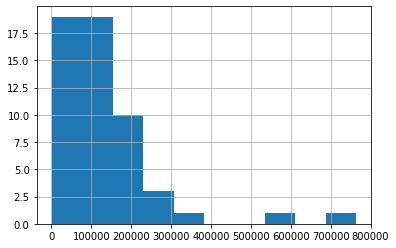

In [12]:
X_test['estimado'] = model.predict(X_test)
X_test['estimado'].hist()

<ipython-input-13-511b1e34ad6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['real'] = y_test


<AxesSubplot:>

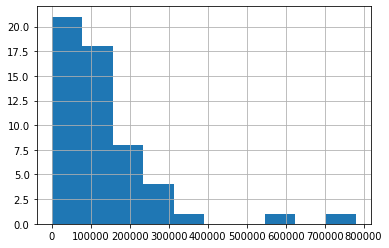

In [13]:
X_test['real'] = y_test
X_test['real'].hist()

In [14]:
X_test[['real','estimado']].describe([i/10 for i in range(10)]+[.05,.95])

,real,estimado
count,54.00,54.00
mean,133157.24,133305.61
std,134864.49,131011.83
min,405.00,1048.88
0%,405.00,1048.88
5%,20247.30,20526.61
10%,25473.80,30070.84
20%,49858.20,59441.43
30%,68777.30,73465.40
40%,78945.80,81509.84


## Validación

In [15]:
val = pd.read_csv(os.path.join(BASE_DIR,'valid.csv'))
backup = val.copy()
print(val.info())
val.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85977 entries, 0 to 85976
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   afluencia    85977 non-null  int64 
 1   id_estacion  85977 non-null  object
 2   t            85977 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ MB
None


,afluencia,id_estacion,t
66607,181977,Est00126,144
78890,405,Est00375,403
20987,238658,Est00168,54
10242,165424,Est00383,691


In [16]:
#Transferir los mismos bines que en entrenamiento
val['t_cut'] = pd.cut(val['t'],bins=q_bins,include_lowest=True)
val['t_cut'].value_counts(1)

(0.999, 78.0]      0.11
(78.0, 156.0]      0.11
(233.667, 311.0]   0.11
(311.0, 389.0]     0.11
(466.333, 544.0]   0.11
(544.0, 622.0]     0.11
(156.0, 233.667]   0.11
(389.0, 466.333]   0.11
(622.0, 699.0]     0.11
Name: t_cut, dtype: float64

In [17]:
#Mismo formato con en el que el modelo entrenó
val = val.pivot_table(index='id_estacion',
                      columns='t_cut',
                      values='afluencia',
                      aggfunc=['sum','mean','median',perc_70])
val.columns = [x+"_"+str(y) for x,y in val.columns]
val = val[X_train.columns].copy()

display(val.sample())
display(val.describe())

,"sum_(0.999, 78.0]","sum_(78.0, 156.0]","sum_(156.0, 233.667]","sum_(233.667, 311.0]","sum_(311.0, 389.0]","sum_(389.0, 466.333]","sum_(466.333, 544.0]","sum_(544.0, 622.0]","sum_(622.0, 699.0]","mean_(0.999, 78.0]","mean_(78.0, 156.0]","mean_(156.0, 233.667]","mean_(233.667, 311.0]","mean_(311.0, 389.0]","mean_(389.0, 466.333]","mean_(466.333, 544.0]","mean_(544.0, 622.0]","mean_(622.0, 699.0]","median_(0.999, 78.0]","median_(78.0, 156.0]","median_(156.0, 233.667]","median_(233.667, 311.0]","median_(311.0, 389.0]","median_(389.0, 466.333]","median_(466.333, 544.0]","median_(544.0, 622.0]","median_(622.0, 699.0]","perc_70_(0.999, 78.0]","perc_70_(78.0, 156.0]","perc_70_(156.0, 233.667]","perc_70_(233.667, 311.0]","perc_70_(311.0, 389.0]","perc_70_(389.0, 466.333]","perc_70_(466.333, 544.0]","perc_70_(544.0, 622.0]","perc_70_(622.0, 699.0]"
id_estacion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Est00047,12025682,11753880,12103432,11796011,13052429,8949315,4121363,6455876,7245393,154175.41,150690.77,157187.43,151230.91,167338.83,116224.87,52837.99,82767.64,94096.01,152752.00,154241.00,150939.00,150902.00,162398.50,116475.00,50868.00,86475.00,100324.00,167106.20,166612.70,168102.60,164682.00,191083.40,139558.20,67891.60,95446.60,108663.60


,"sum_(0.999, 78.0]","sum_(78.0, 156.0]","sum_(156.0, 233.667]","sum_(233.667, 311.0]","sum_(311.0, 389.0]","sum_(389.0, 466.333]","sum_(466.333, 544.0]","sum_(544.0, 622.0]","sum_(622.0, 699.0]","mean_(0.999, 78.0]","mean_(78.0, 156.0]","mean_(156.0, 233.667]","mean_(233.667, 311.0]","mean_(311.0, 389.0]","mean_(389.0, 466.333]","mean_(466.333, 544.0]","mean_(544.0, 622.0]","mean_(622.0, 699.0]","median_(0.999, 78.0]","median_(78.0, 156.0]","median_(156.0, 233.667]","median_(233.667, 311.0]","median_(311.0, 389.0]","median_(389.0, 466.333]","median_(466.333, 544.0]","median_(544.0, 622.0]","median_(622.0, 699.0]","perc_70_(0.999, 78.0]","perc_70_(78.0, 156.0]","perc_70_(156.0, 233.667]","perc_70_(233.667, 311.0]","perc_70_(311.0, 389.0]","perc_70_(389.0, 466.333]","perc_70_(466.333, 544.0]","perc_70_(544.0, 622.0]","perc_70_(622.0, 699.0]"
count,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00
mean,11560298.22,11839844.99,11836881.73,12364638.59,12109561.59,11258075.96,8093418.12,9264937.57,9790027.97,148208.95,151792.88,153725.74,158521.01,155250.79,146208.78,103761.77,118781.25,127143.22,158316.92,162306.99,161141.84,169679.53,162815.21,153562.32,109126.75,123189.44,133815.19,172934.85,175081.99,174417.35,182533.13,181777.18,174214.56,116727.94,131819.65,142364.66
std,8849951.62,8833423.51,8812138.99,9370994.27,9012763.20,7671053.94,7454848.95,7468620.31,7384694.98,113460.92,113249.02,114443.36,120140.95,115548.25,99624.08,95574.99,95751.54,95905.13,121312.53,122360.18,120490.57,129930.05,121211.83,104358.15,101464.85,98726.81,99743.58,133417.96,130811.22,130041.48,139089.76,138503.65,117417.24,106083.31,103749.72,105353.38
min,31590.00,31590.00,31185.00,31590.00,31590.00,31185.00,31590.00,31590.00,31185.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00,405.00
25%,5856986.00,5861711.50,5805198.00,6171491.00,6046584.50,5586266.50,2549195.50,3927449.00,4427471.00,75089.56,75150.15,75392.18,79121.68,77520.31,72548.92,32681.99,50351.91,57499.62,80191.25,77557.75,80348.00,83054.00,82737.75,78593.00,34281.75,51624.50,60075.50,85914.95,85191.90,84866.50,89620.85,91268.60,89301.20,37395.65,56793.05,63932.70
50%,10469448.00,10604455.00,10844918.00,10985835.00,10755819.00,10063805.00,5770261.00,7255757.00,7932590.00,134223.69,135954.55,140843.09,140844.04,137895.12,130698.77,73977.71,93022.53,103020.65,141324.00,142034.00,143915.00,150086.00,142530.50,140066.00,78457.00,97087.00,108620.00,154192.70,156918.00,157628.20,162782.70,164343.10,157697.80,88436.50,105925.00,117106.20
75%,14596369.00,14515850.50,14814659.50,15171334.00,15348355.00,14428839.00,11735235.50,13187821.00,14256333.00,187132.94,186100.65,192398.18,194504.28,196773.78,187387.52,150451.74,169074.63,185147.18,201216.50,203420.00,209399.50,211159.00,210997.50,201055.50,161707.75,179322.50,195989.00,217217.75,218396.55,223411.60,227890.55,236234.55,226595.80,175560.90,188985.60,212215.70
max,47368771.00,45200619.00,49558363.00,54703699.00,54161644.00,44890642.00,44179444.00,45274997.00,44556458.00,607291.94,579495.12,643615.10,701329.47,694380.05,582995.35,566403.13,580448.68,578655.30,635606.00,626360.50,675334.00,775538.50,704661.00,591729.00,590332.00,593141.00,593946.00,718878.90,675886.60,735691.80,817481.20,841284.80,617173.80,605769.40,614089.90,620065.60


<AxesSubplot:>

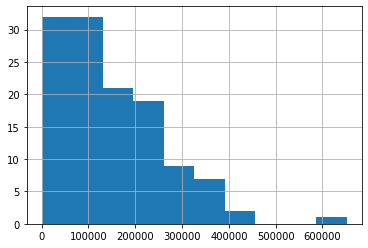

In [18]:
val['afluencia'] = model.predict(val)
val['afluencia'].hist()

In [19]:
prediccion = val[['afluencia']]
prediccion.insert(1,'t',700)
prediccion = prediccion.reset_index()[['afluencia','id_estacion','t']].copy()
prediccion

,afluencia,id_estacion,t
0,95654.76,Est00003,700
1,299294.69,Est00004,700
2,195112.97,Est00008,700
3,250125.88,Est00012,700
4,89272.34,Est00023,700
...,...,...,...
118,1048.88,Est00375,700
119,93110.21,Est00378,700
120,32968.28,Est00380,700
121,166433.24,Est00383,700


In [21]:
backup.append(prediccion).to_csv(os.path.join(BASE_DIR,'estimado.csv'),index=False)